In [236]:
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score

import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [191]:
imoveis_aluguel = pd.read_csv('~/Downloads/houses_to_rent_v2.csv')

In [192]:
imoveis_aluguel   

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [193]:
imoveis_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [201]:
imoveis_aluguel.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [194]:
imoveis_aluguel.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [195]:
imoveis_aluguel.furniture.value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [196]:
apartamentos = imoveis_aluguel[(imoveis_aluguel.floor != '-') & (imoveis_aluguel.floor != '301')]
apartamentos.loc[:,'floor'] = apartamentos['floor'].astype(int)
apartamentos.rename(columns={'rent amount (R$)' : 'rent'}, inplace = True)
apartamentos

/home/vitorxl/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/vitorxl/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


In [197]:
apartamentos.floor.value_counts()

1     1081
2      985
3      931
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
51       1
46       1
35       1
Name: floor, dtype: int64

In [200]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8230 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 8230 non-null   object
 1   area                 8230 non-null   int64 
 2   rooms                8230 non-null   int64 
 3   bathroom             8230 non-null   int64 
 4   parking spaces       8230 non-null   int64 
 5   floor                8230 non-null   int64 
 6   animal               8230 non-null   object
 7   furniture            8230 non-null   object
 8   hoa (R$)             8230 non-null   int64 
 9   rent                 8230 non-null   int64 
 10  property tax (R$)    8230 non-null   int64 
 11  fire insurance (R$)  8230 non-null   int64 
 12  total (R$)           8230 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 900.2+ KB


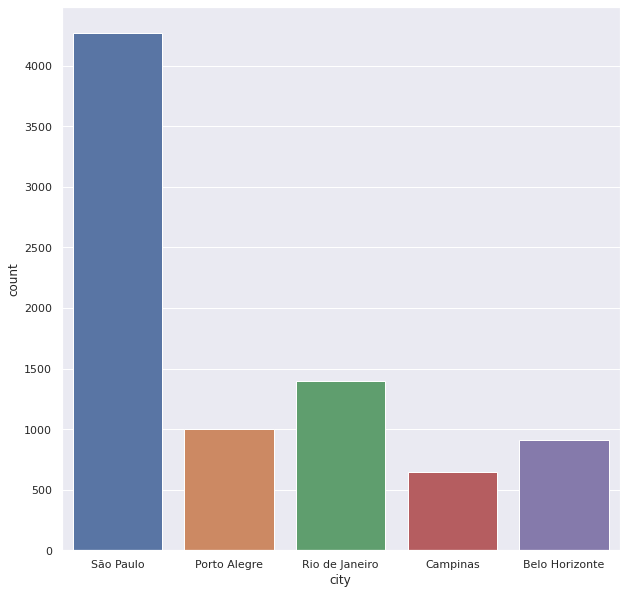

In [86]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'city', data = apartamentos)
plt.show()

In [202]:
apartamentos.area.describe()

count     8230.000000
mean       124.585176
std        601.070648
min         11.000000
25%         54.000000
50%         80.000000
75%        141.000000
max      46335.000000
Name: area, dtype: float64

In [203]:
apartamentos.area.sort_values(ascending = False).head(20)

2397     46335
5915     24606
9241     12732
8790      2000
1250      1000
10184     1000
6615      1000
3772       950
421        900
4114       900
7679       884
8397       856
5293       850
3533       800
8425       758
2097       720
8399       717
5481       700
9085       690
2697       685
Name: area, dtype: int64

In [204]:
apartamentos = apartamentos[apartamentos.area < 2000]
apartamentos.area.describe()

count    8226.000000
mean      114.230853
std        95.448864
min        11.000000
25%        54.000000
50%        80.000000
75%       140.750000
max      1000.000000
Name: area, dtype: float64

<AxesSubplot:xlabel='area', ylabel='Count'>

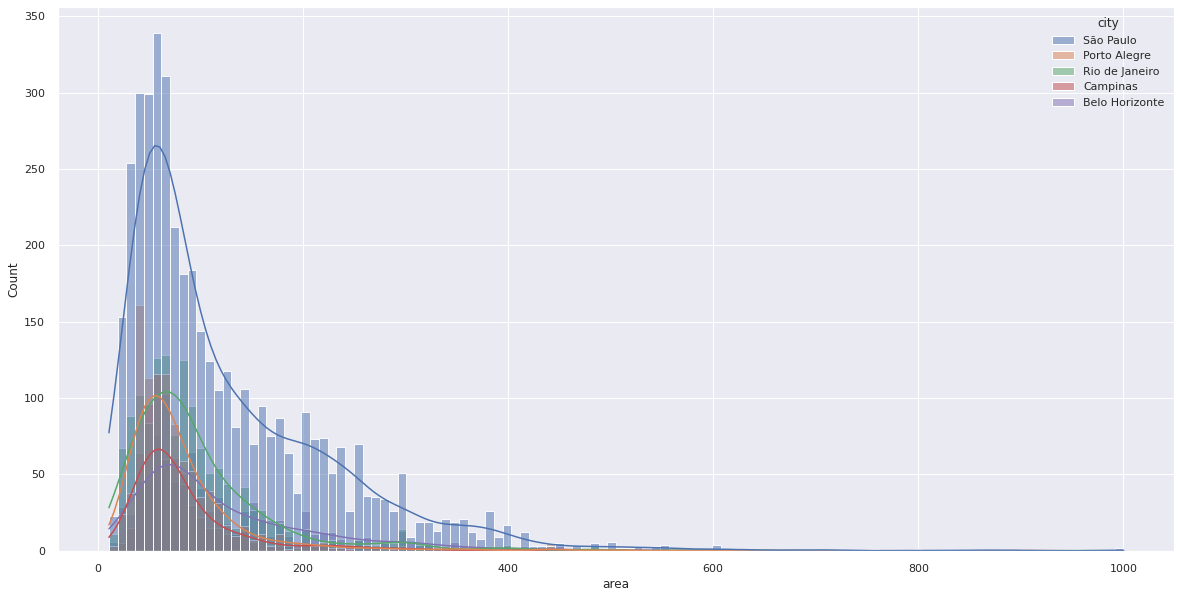

In [237]:
plt.figure(figsize = (20, 10))
sns.histplot(data = apartamentos, x = 'area', kde = True, hue = 'city')

<AxesSubplot:xlabel='area', ylabel='Count'>

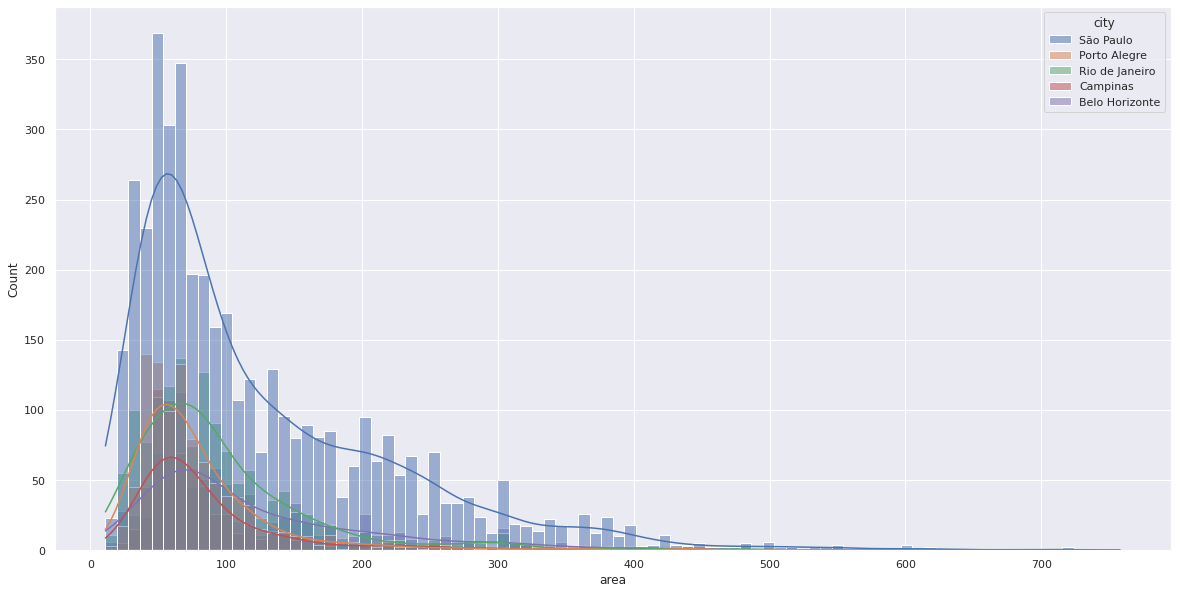

In [206]:
plt.figure(figsize = (20, 10))
sns.histplot(data = apartamentos[apartamentos.area < 800], x = 'area', kde = True, hue = 'city')

<AxesSubplot:xlabel='city', ylabel='area'>

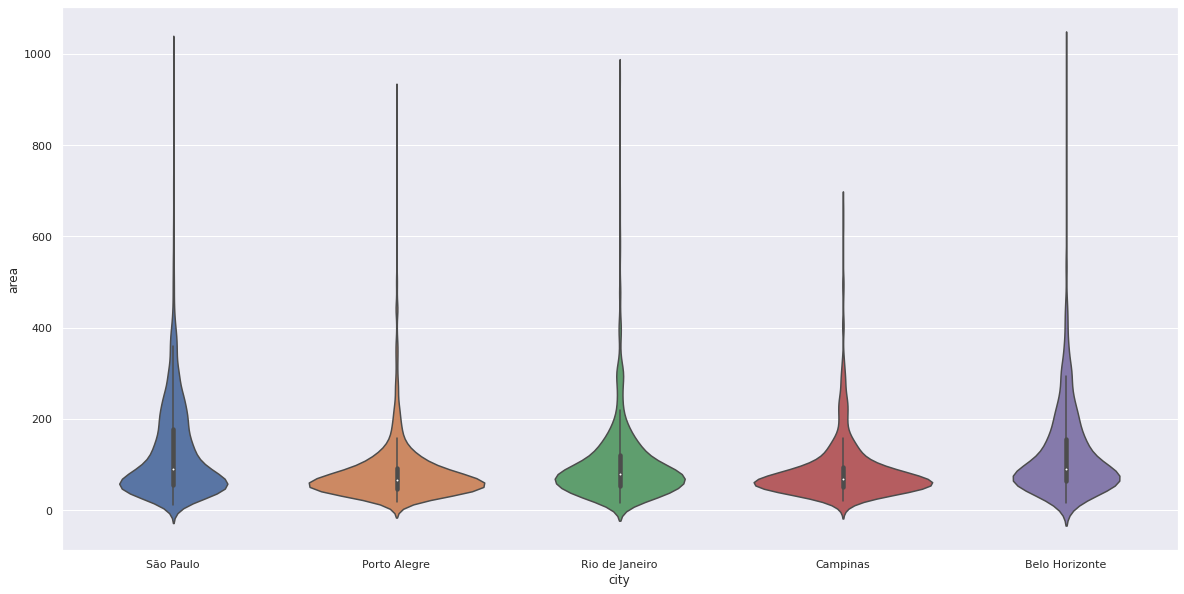

In [207]:
plt.figure(figsize=(20,10))
sns.violinplot(data = apartamentos, x = 'city', y = 'area')

<AxesSubplot:xlabel='area', ylabel='rent'>

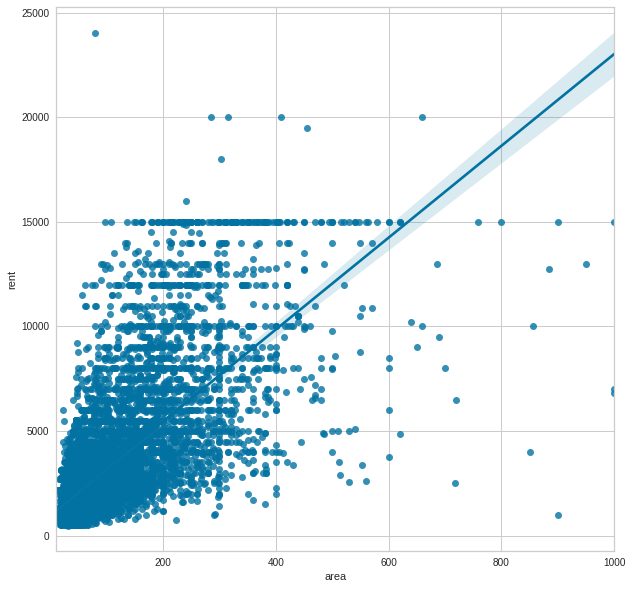

In [234]:
plt.figure(figsize=(10,10))
sns.regplot(data = apartamentos, x = 'area', y = 'rent')

<AxesSubplot:xlabel='rent', ylabel='animal'>

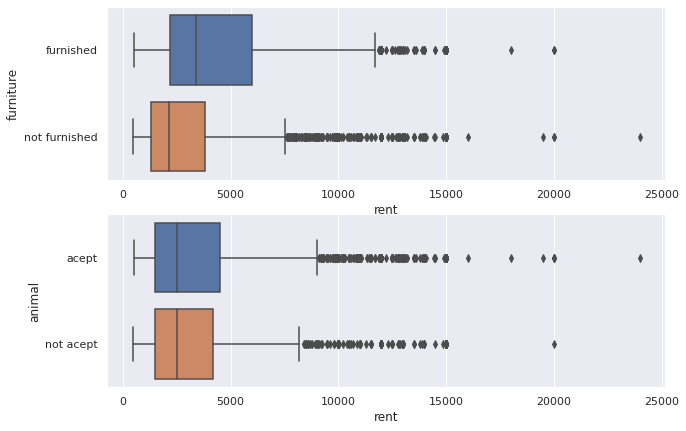

In [209]:
fig, axes = plt.subplots(2, 1, figsize = (10, 7))
sns.boxplot(ax = axes[0], data = apartamentos, orient = 'h', x = 'rent', y = 'furniture')
sns.boxplot(ax = axes[1], data = apartamentos, orient = 'h', x = 'rent', y = 'animal')

In [210]:

fit = ols('rent ~ animal', data = apartamentos).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.399
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.237
Time:                        17:41:50   Log-Likelihood:                -77902.
No. Observations:                8226   AIC:                         1.558e+05
Df Residuals:                    8224   BIC:                         1.558e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3603.8110     39.480     91.282      0.000    3526.420    3681.202
animal[T.not acept]   -96.9772     81.975     -1.183      0.237    -257.669      63.715
==============================================================================
Omnibus:                     3002.389   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9524.312
Skew:                           1.910   Prob(JB):                         0.00
Kurtosis:                       6.632   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
fit = ols('rent ~ furniture', data = apartamentos).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     342.6
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           5.68e-75
Time:                        17:41:52   Log-Likelihood:                -77735.
No. Observations:                8226   AIC:                         1.555e+05
Df Residuals:                    8224   BIC:                         1.555e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4604.0400     64.826     71.021      0.000    4476.964    4731.116
furniture[T.not furnished] -1407.7838     76.057    -18.510      0.000   -1556.875   -1258.693
==============================================================================
Omnibus:                     3071.218   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10206.925
Skew:                           1.933   Prob(JB):                         0.00
Kurtosis:                       6.851   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

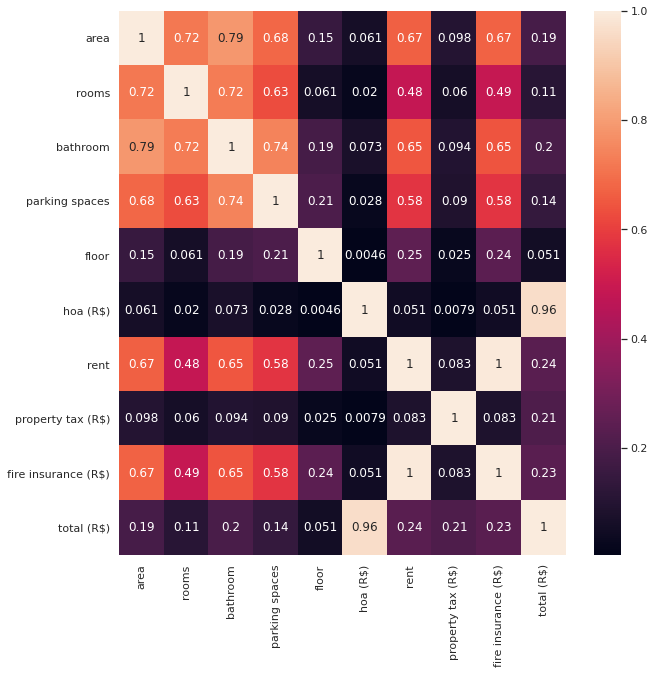

In [212]:
plt.figure(figsize=(10,10))
sns.heatmap(apartamentos.corr(), annot = True)

In [187]:
apartamentos['rent']    

0         3300
1         4960
2         2800
3         1112
4          800
         ...  
10686    13500
10687     1478
10688    15000
10689     6000
10690    12000
Name: rent, Length: 8230, dtype: int64

In [238]:
apt = pd.get_dummies(apartamentos)

X = apt.drop(['rent'], axis = 1)
y = apt['rent']
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
ev_reg = explained_variance_score(y_test, y_pred)
mae_reg = mean_absolute_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)
print('Explained variance: ', ev_reg, 'Mean Absolute Error: ', mae_reg, 'R²: ', r2_reg)

Explained variance:  0.9999857638400341 Mean Absolute Error:  0.8320385094882659 R²:  0.9999857530736266


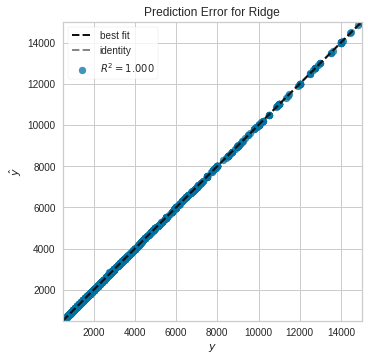

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [233]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

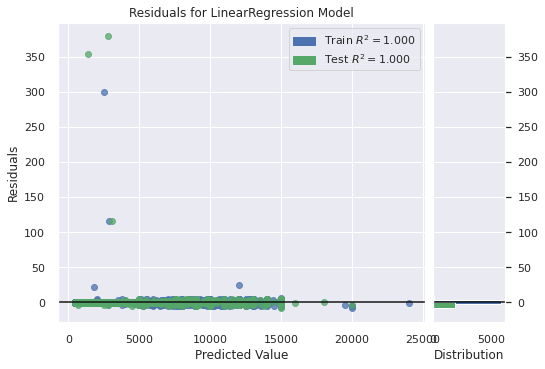

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [239]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
